# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - Group Assignment #1

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Step 2: Downloading the Dataset
We are using the Utrecht Fairness Recruitment dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset]

## Recruitment Analysis 
### Introduction
We have a dataset collating details of applicants to 4 different companies. The dataset contains details like age, gender, nationality etc. 

In this assignment we are trying to analyse the dataset and find the impact of gender age nationality previous experiences etc in getting selected for the role. The steps in doing it are divided into 3 parts

- Cleansing the data
- Extracting and exploring various subsets of data.
- Arrive at any possible conclusions or insights using the analysed information in step 2.

## Step 3 : Data Cleansing

### Data Cleansing Process for User Data (Talent Acquisition) from a CSV File

#### Reading the data

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

file = "recruitment_dataset.csv"
df_unfiltered = pd.read_csv(file)
row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 4000


##### Removing empty valued rows from the dataset
By giving axis as 0 we filter rows with any empty values. 

In [199]:
df = df_unfiltered.dropna(axis=0, how='any')
print("Total number of datapoints(rows)", len(df))

Total number of datapoints(rows) 4000


We understand that there are no rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

## Step 4 : Understanding the data
The name of the companies are not revealed and the companies are masked under names A, B, C and D. In this step we try to figure out possible bias in the following verticals grouped by the different companies. 
- Languages Spoken
- University Grade
- Age
- University degree

## Step 5 : Encapsulate the code in classes, methods
### As a first step we need to create a class named RecruitmentAnalysis which will have the following methods

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from matplotlib_venn import venn2, venn3

class RecruitmentAnalysis:
    def __init__(self, file):
        # Load the CSV file and remove rows with any missing values (NaN)
        self.df_unfiltered = pd.read_csv(file)
        self.df = self.df_unfiltered.dropna(axis=0, how='any')

    def display_row_counts(self):
        # Display the total number of rows before and after filtering
        print("Total number of datapoints (rows)", len(self.df_unfiltered))
        print("Total number of filtered datapoints (rows)", len(self.df))

    def split_by_company(self):
        # Split the dataset into subsets based on the company (A, B, C, D)
        self.df_a = self.df[self.df['company'] == 'A']
        self.df_b = self.df[self.df['company'] == 'B']
        self.df_c = self.df[self.df['company'] == 'C']
        self.df_d = self.df[self.df['company'] == 'D']

        # Display the number of datapoints for each company
        print(f"Datapoints for company A: {len(self.df_a)}")
        print(f"Datapoints for company B: {len(self.df_b)}")
        print(f"Datapoints for company C: {len(self.df_c)}")
        print(f"Datapoints for company D: {len(self.df_d)}")

    def plot_pie_chart(self, df_company, title):
        # Plot a pie chart for hiring decisions of a specific company
        decision = df_company.groupby('decision').size()  # Count the decisions per company
        _, ax = plt.subplots(figsize=(3, 3))
        decision.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, legend=True)  # Pie chart
        ax.set_title(title)
        ax.set_ylabel('')  # Remove y-axis label for cleaner chart
        plt.show()

    def plot_company_decision_pie_charts(self):
        # Plot pie charts for hiring decisions of all companies (A, B, C, D)
        self.plot_pie_chart(self.df_a, 'Hiring decisions - A')
        self.plot_pie_chart(self.df_b, 'Hiring decisions - B')
        self.plot_pie_chart(self.df_c, 'Hiring decisions - C')
        self.plot_pie_chart(self.df_d, 'Hiring decisions - D')

    @staticmethod
    def calculate_mode(df):
        # Calculate mode (most frequent value) of a dataframe column
        return df.mode()[0] if not df.mode().empty else None

    @staticmethod
    def aggregate_analysis(df, group_by_column, value_column):
        # Perform aggregate analysis to calculate mean, median, mode, variance, SD, and quartiles
        return df.groupby(group_by_column)[value_column].agg(
            Mean=lambda x: round(x.mean(), 2),
            Median='median',
            Mode=RecruitmentAnalysis.calculate_mode,
            Variance=lambda x: round(x.var(), 2),
            SD=lambda x: round(x.std(), 2),
            Q1=lambda x: round(x.quantile(0.25), 2),
            Q2=lambda x: round(x.quantile(0.5), 2),
            Q3=lambda x: round(x.quantile(0.75), 2),
            Q4=lambda x: round(x.quantile(1.00), 2)
        ).reset_index()

    def perform_aggregation(self, group_by_column, value_column, company_label):
        # Perform aggregation analysis for all companies and print results in tabulated form
        agg_a = self.aggregate_analysis(self.df_a, group_by_column, value_column)
        agg_b = self.aggregate_analysis(self.df_b, group_by_column, value_column)
        agg_c = self.aggregate_analysis(self.df_c, group_by_column, value_column)
        agg_d = self.aggregate_analysis(self.df_d, group_by_column, value_column)

        # Print the aggregated results for each company using a tabular format
        self.print_using_tabulate(agg_a, [f'{company_label} A - Hiring', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
        self.print_using_tabulate(agg_b, [f'{company_label} B - Hiring', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
        self.print_using_tabulate(agg_c, [f'{company_label} C - Hiring', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
        self.print_using_tabulate(agg_d, [f'{company_label} D - Hiring', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])

    @staticmethod
    def print_using_tabulate(df, header_list):
        # Print the dataframe in a formatted table using the tabulate library
        print(tabulate(df, headers=header_list, tablefmt='pretty', showindex=False))

    def plot_scatter(self, x, y, title, x_label, y_label):
        # Plot a scatter plot to visualize the relationship between two variables
        plt.figure(figsize=(10, 6))
        plt.scatter(self.df[x], self.df[y])
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        # Calculate and display summary statistics
        x_mean = self.df[x].mean()
        y_mean = self.df[y].mean()
        correlation = self.df[[x, y]].corr().iloc[0, 1]
        
        summary_text = (
            f"Summary:\n"
            f"Mean of {x}: {x_mean:.2f}\n"
            f"Mean of {y}: {y_mean:.2f}\n"
            f"Correlation between {x} and {y}: {correlation:.2f}"
        )
        plt.figtext(0.15, -0.1, summary_text, wrap=True, fontsize=12, ha='left')
        
        plt.show()

    def plot_histogram(self, column, title, x_label, y_label):
        # Plot a histogram to show the frequency distribution of a specific column
        plt.figure(figsize=(10, 6))
        plt.hist(self.df[column], bins=10, alpha=0.75)
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        # Calculate and display summary statistics
        mean = self.df[column].mean()
        median = self.df[column].median()
        std_dev = self.df[column].std()
        min_val = self.df[column].min()
        max_val = self.df[column].max()
        
        summary_text = (
            f"Summary:\n"
            f"Mean: {mean:.2f}\n"
            f"Median: {median:.2f}\n"
            f"Standard Deviation: {std_dev:.2f}\n"
            f"Min: {min_val:.2f}\n"
            f"Max: {max_val:.2f}"
        )
        plt.figtext(0.15, -0.1, summary_text, wrap=True, fontsize=12, ha='left')
        
        plt.show()

    def plot_box_whisker(self, x, y, title, x_label, y_label):
        # Plot a box-whisker plot to display the distribution and outliers for a dataset
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=x, y=y, data=self.df)
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        # Calculate and display summary statistics
        median = self.df[y].median()
        q1 = self.df[y].quantile(0.25)
        q3 = self.df[y].quantile(0.75)
        iqr = q3 - q1
        
        summary_text = (
            f"Summary:\n"
            f"Median: {median:.2f}\n"
            f"Q1: {q1:.2f}\n"
            f"Q3: {q3:.2f}\n"
            f"IQR: {iqr:.2f}"
        )
        plt.figtext(0.15, -0.1, summary_text, wrap=True, fontsize=12, ha='left')
        
        plt.show()


 
    def plot_degree_hired_venn(self):
        # Identify hired candidates by degree
        hired_bachelors = set(self.df[(self.df['decision'] == True) & (self.df['ind-degree'] == 'bachelor')]['Id'])
        hired_masters = set(self.df[(self.df['decision'] == True) & (self.df['ind-degree'] == 'master')]['Id'])
        hired_phd = set(self.df[(self.df['decision'] == True) & (self.df['ind-degree'] == 'phd')]['Id'])

        # Calculate total candidates with each degree
        total_bachelors = hired_bachelors | hired_masters | hired_phd
        total_masters = hired_masters | hired_phd
        total_phd = hired_phd

        # Plot Venn diagram
        plt.figure(figsize=(10, 10))
        venn3(subsets=(len(total_bachelors - total_masters),  # Only Bachelors
                    len(total_masters - total_phd),        # Only Masters
                    len(total_bachelors & total_masters - total_phd),  # Bachelors and Masters
                    len(total_phd),                        # Only PhD
                    len(total_bachelors & total_phd - total_masters),  # Bachelors and PhD
                    len(total_masters & total_phd - total_bachelors),  # Masters and PhD
                    len(total_bachelors & total_masters & total_phd)), # All three
            set_labels=('Total Bachelors', 'Total Masters', 'Total PhDs'))
        plt.title('Venn Diagram of Hired Candidates by Degree')
        plt.show()

        # Calculate total hired people
        total_hired = len(hired_bachelors | hired_masters | hired_phd)

        # Print detailed summary
        print(f"Total Hired: {total_hired} candidates were hired.")
        print(f"Total Bachelors: {len(total_bachelors)} candidates were hired with a Bachelor's degree (including those with Master's and Bachelor's).")
        print(f"Total Masters: {len(total_masters)} candidates were hired with a Master's degree (including those with PhD).")
        print(f"Total PhD: {len(total_phd)} candidates were hired with a PhD.")
        print(f"Only Bachelors: {len(hired_bachelors - hired_masters - hired_phd)} candidates were hired with only a Bachelor's degree.")
        print(f"Only Masters: {len(hired_masters - hired_phd)} candidates were hired with only a Master's degree.")
        print(f"Only PhD: {len(hired_phd)} candidates were hired with only a PhD.")


In [201]:
# Reading the data
file = "recruitment_dataset.csv"
analysis = RecruitmentAnalysis(file)

In [202]:
# Display row counts
analysis.display_row_counts()

Total number of datapoints (rows) 4000
Total number of filtered datapoints (rows) 4000


In [203]:
# Split data by company
analysis.split_by_company()

Datapoints for company A: 1000
Datapoints for company B: 1000
Datapoints for company C: 1000
Datapoints for company D: 1000


## Step 5 : summary of the use case
The dataset, with 4000 candidates from four companies, includes attributes like gender, age, and experience. It can be used for predictive modeling to forecast hiring decisions and to analyze fairness and bias in recruitment practices. Key analyses include feature importance, bias detection, and fairness evaluation.

## Step 6 : Analyzing the Data
### Hiring decision analysis based on Age

In [204]:
# Perform aggregation analysis
group_by_column = 'decision'
value_column = 'age'
analysis.perform_aggregation(group_by_column, value_column, 'Age')

+----------------+-------+--------+------+----------+------+------+------+------+------+
| Age A - Hiring | Mean  | Median | Mode | Variance |  SD  |  Q1  |  Q2  |  Q3  |  Q4  |
+----------------+-------+--------+------+----------+------+------+------+------+------+
|     False      | 25.99 |  26.0  |  27  |   7.83   | 2.8  | 24.0 | 26.0 | 28.0 | 32.0 |
|      True      | 26.34 |  26.0  |  26  |   7.03   | 2.65 | 24.0 | 26.0 | 28.0 | 32.0 |
+----------------+-------+--------+------+----------+------+------+------+------+------+
+----------------+-------+--------+------+----------+------+------+------+------+------+
| Age B - Hiring | Mean  | Median | Mode | Variance |  SD  |  Q1  |  Q2  |  Q3  |  Q4  |
+----------------+-------+--------+------+----------+------+------+------+------+------+
|     False      | 26.25 |  26.0  |  28  |   8.83   | 2.97 | 24.0 | 26.0 | 28.0 | 32.0 |
|      True      | 26.43 |  26.0  |  25  |   5.81   | 2.41 | 25.0 | 26.0 | 28.0 | 32.0 |
+----------------+---

### Hiring Decision Analysis based on university grade

In [205]:
group_by_column = 'decision'
value_column = 'ind-university_grade'
analysis.perform_aggregation(group_by_column, value_column, 'University Grades')

+------------------------------+-------+--------+------+----------+------+------+------+------+------+
| University Grades A - Hiring | Mean  | Median | Mode | Variance |  SD  |  Q1  |  Q2  |  Q3  |  Q4  |
+------------------------------+-------+--------+------+----------+------+------+------+------+------+
|            False             | 61.67 |  62.0  |  65  |  39.42   | 6.28 | 57.0 | 62.0 | 66.0 | 75.0 |
|             True             | 63.12 |  63.0  |  61  |  26.42   | 5.14 | 59.0 | 63.0 | 67.0 | 77.0 |
+------------------------------+-------+--------+------+----------+------+------+------+------+------+
+------------------------------+-------+--------+------+----------+------+------+------+------+------+
| University Grades B - Hiring | Mean  | Median | Mode | Variance |  SD  |  Q1  |  Q2  |  Q3  |  Q4  |
+------------------------------+-------+--------+------+----------+------+------+------+------+------+
|            False             | 62.99 |  63.0  |  64  |  33.66   | 5.8  

### Hiring Decision Analysis based on Languages spoken

In [206]:
group_by_column = 'decision'
value_column = 'ind-languages'
analysis.perform_aggregation(group_by_column, value_column, 'Languages spoken')

+-----------------------------+------+--------+------+----------+------+-----+-----+-----+-----+
| Languages spoken A - Hiring | Mean | Median | Mode | Variance |  SD  | Q1  | Q2  | Q3  | Q4  |
+-----------------------------+------+--------+------+----------+------+-----+-----+-----+-----+
|            False            | 1.05 |  1.0   |  1   |   0.7    | 0.84 | 0.0 | 1.0 | 2.0 | 3.0 |
|            True             | 1.72 |  2.0   |  1   |   0.5    | 0.71 | 1.0 | 2.0 | 2.0 | 3.0 |
+-----------------------------+------+--------+------+----------+------+-----+-----+-----+-----+
+-----------------------------+------+--------+------+----------+------+-----+-----+-----+-----+
| Languages spoken B - Hiring | Mean | Median | Mode | Variance |  SD  | Q1  | Q2  | Q3  | Q4  |
+-----------------------------+------+--------+------+----------+------+-----+-----+-----+-----+
|            False            | 0.98 |  1.0   |  1   |   0.44   | 0.66 | 1.0 | 1.0 | 1.0 | 3.0 |
|            True             

### Scatter Plot for Age vs University Grade

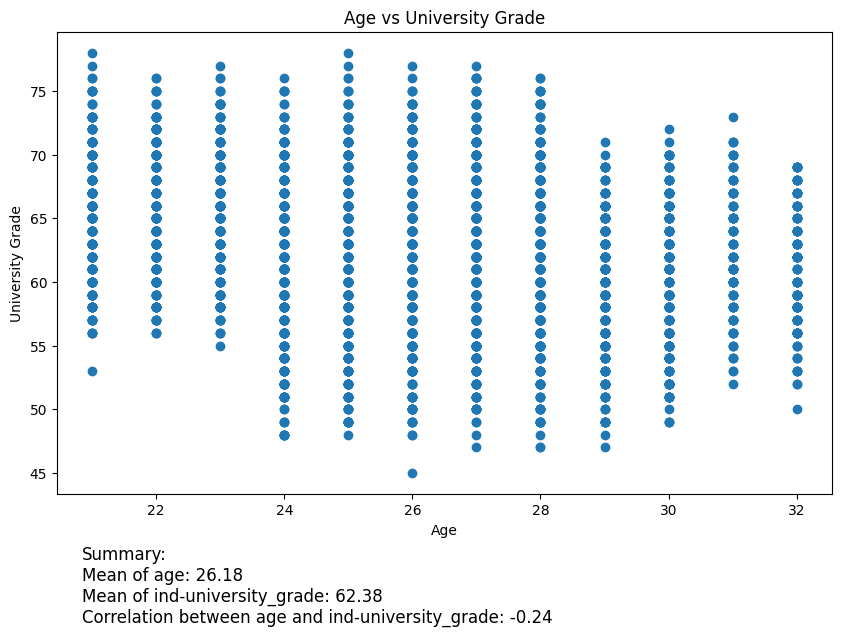

In [207]:
# Scatter plot
analysis.plot_scatter('age', 'ind-university_grade', 'Age vs University Grade', 'Age', 'University Grade')

### Histogram Plot for Age vs Hiring Decision

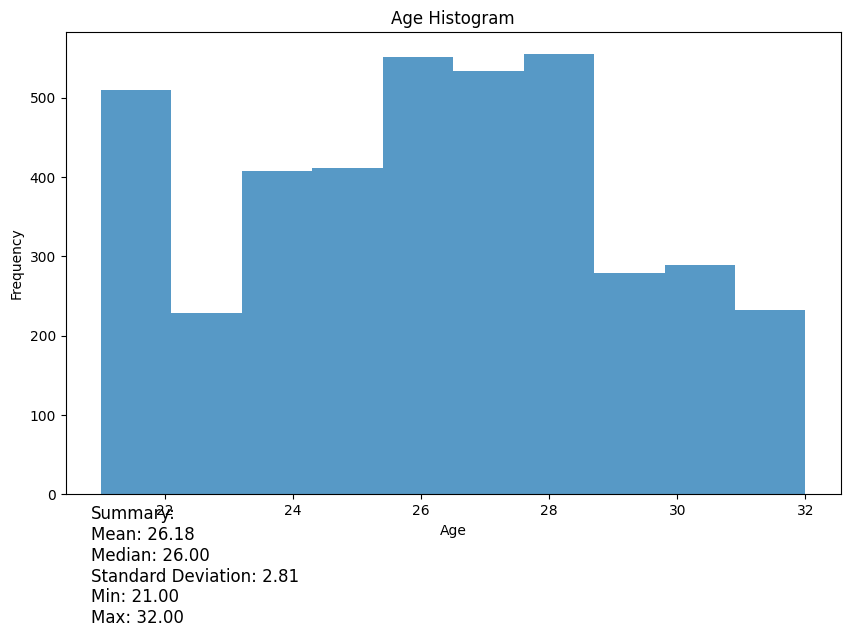

In [208]:
# Histogram plot
analysis.plot_histogram('age', 'Age Histogram', 'Age', 'Frequency')

### Box whisker plot for university grade vs age

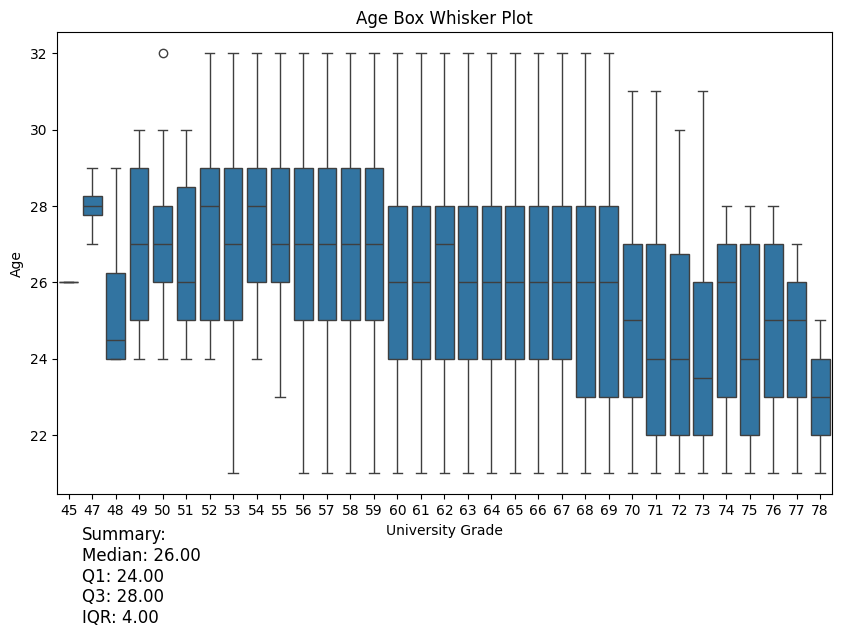

In [209]:
# Box-Whisker plot
analysis.plot_box_whisker('ind-university_grade', 'age', 'Age Box Whisker Plot', 'University Grade', 'Age')

### Venn Diagram for Languages spoken

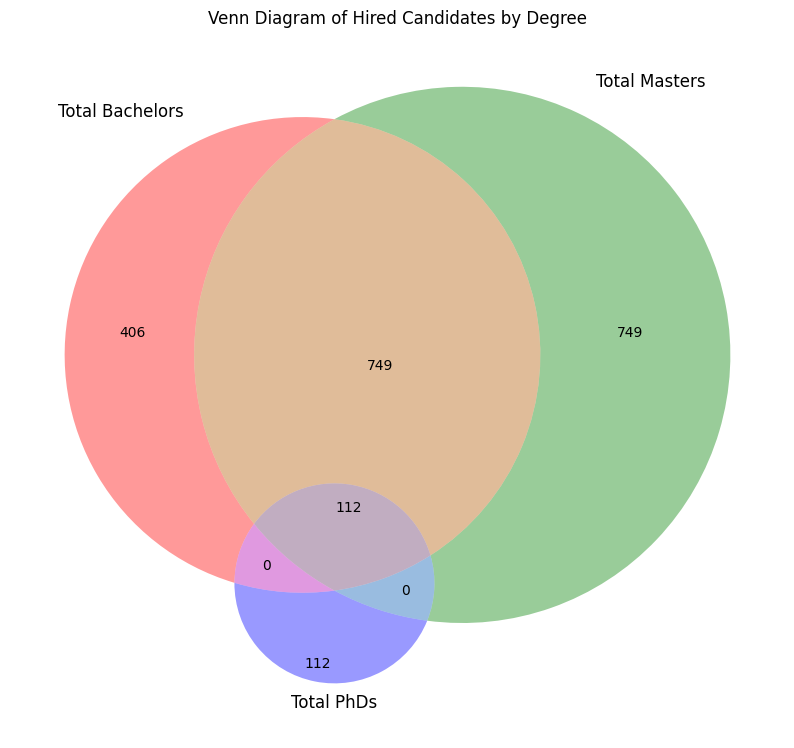

Total Hired: 1267 candidates were hired.
Total Bachelors: 1267 candidates were hired with a Bachelor's degree (including those with Master's and Bachelor's).
Total Masters: 861 candidates were hired with a Master's degree (including those with PhD).
Total PhD: 112 candidates were hired with a PhD.
Only Bachelors: 406 candidates were hired with only a Bachelor's degree.
Only Masters: 749 candidates were hired with only a Master's degree.
Only PhD: 112 candidates were hired with only a PhD.


In [210]:
# plot the venn diagram of hired candidates based on gender
analysis.plot_degree_hired_venn()

## Step 7 : The numerical summary of the data across different companies is as follows:

The dataset contains information on 4000 candidates from four companies, focusing on hiring decisions based on factors like age, university grades, and languages spoken.

## Age Summary:
- The **average age** of candidates hired is around **26.18 years**, with a **median of 26**. The **standard deviation** is approximately **2.81**, indicating a slight variation around the mean. The **youngest candidate** is 21, while the **oldest** is 32.
- The hiring rates vary slightly based on age across different companies, with the **mean ages of hired candidates** ranging between **25.82** and **26.97 years**.

## University Grades Summary:
- The **average university grade** for hired candidates is around **62.38**.
- In some companies, hired candidates tend to have higher average grades (e.g., **68.74** in one company), while in others, the average grade is lower (e.g., **60.92**).
- The **correlation** between age and university grade is **weakly negative (-0.24)**, suggesting that older candidates tend to have slightly lower grades.

## Languages Spoken Summary:
- The **average number of languages spoken** by hired candidates varies across companies, ranging from **1.32** to **2.27 languages**.
- Generally, hired candidates speak more languages on average than those not hired.

## Hiring by Educational Degree:
- A total of **1267 candidates** were hired.
- Of these, **861 had a Master’s degree**, **112 held a PhD**, and **406 had only a Bachelor's degree**.
- Among those hired, candidates with higher education degrees (Master’s or PhD) were more likely to be hired.

## Statistical Insights:
- The **interquartile range (IQR)** of ages is **4**, with the middle 50% of candidates falling between **24 and 28 years old**.
- A total of **1267 candidates** were hired, with most holding at least a **Bachelor’s degree**.
